# Temporal Analysis of Temperature Trends

This notebook aims to use the EDA and apply statistical methods in order to analyze the current trend of temperature, in hopes of predicting how temperature will change in the future

### Learnings:
- apply linear regression method to predict the current/future trend of temperature based on the R^2 value and slope of the graph
- apply the mann kendall test to determine if temperature has a general upward or downward trend
- based on statistical methods, evaluate whether temperature variation throughout the decades are drastically changing or not

## Set Up

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as stats
from scipy import signal
from scipy import stats
import pymannkendall as mk
import sys
import os
import seaborn as sns

# Update paths to get source code from notebook_utils
curr_dir = os.path.dirname(os.path.abspath('notebooks'))
proj_dir = os.path.dirname(curr_dir)
src_path = os.path.join(proj_dir, 'src')
sys.path.append(src_path)

from notebook_utils.preprocessing import *
from notebook_utils.temporal_analysis import *

# Create combined dataframe from ghcn_cleaned files
CA_stations_dfs = combine_files_to_dfs('../data/processed/ghcn_cleaned')

Processed file: CA_2003_clean.csv
Processed file: CA_2004_clean.csv
Processed file: CA_2005_clean.csv
Processed file: CA_2006_clean.csv
Processed file: CA_2007_clean.csv
Processed file: CA_2008_clean.csv
Processed file: CA_2009_clean.csv
Processed file: CA_2010_clean.csv
Processed file: CA_2011_clean.csv
Processed file: CA_2012_clean.csv
Processed file: CA_2013_clean.csv
Processed file: CA_2014_clean.csv
Processed file: CA_2015_clean.csv
Processed file: CA_2016_clean.csv
Processed file: CA_2017_clean.csv
Processed file: CA_2018_clean.csv
Processed file: CA_2019_clean.csv
Processed file: CA_2020_clean.csv
Processed file: CA_2021_clean.csv
Processed file: CA_2022_clean.csv
Processed file: CA_2023_clean.csv


# Trend Analysis

Analyze trends in temperature data over time.

### (Maybe) Linear Regression

### (Maybe) Mann-Kendall Trend Test

# Seasonal Variations

Examine seasonal patterns and changes in temperature across different years.

### Calculate Mean Temperature by season

In [3]:
seasonal_avg = CA_stations_dfs.groupby('Season')['Temperature'].mean().round(4).reset_index()
print(seasonal_avg)

   Season  Temperature
0    Fall      16.3726
1  Spring      14.3939
2  Summer      21.2061
3  Winter       9.6668


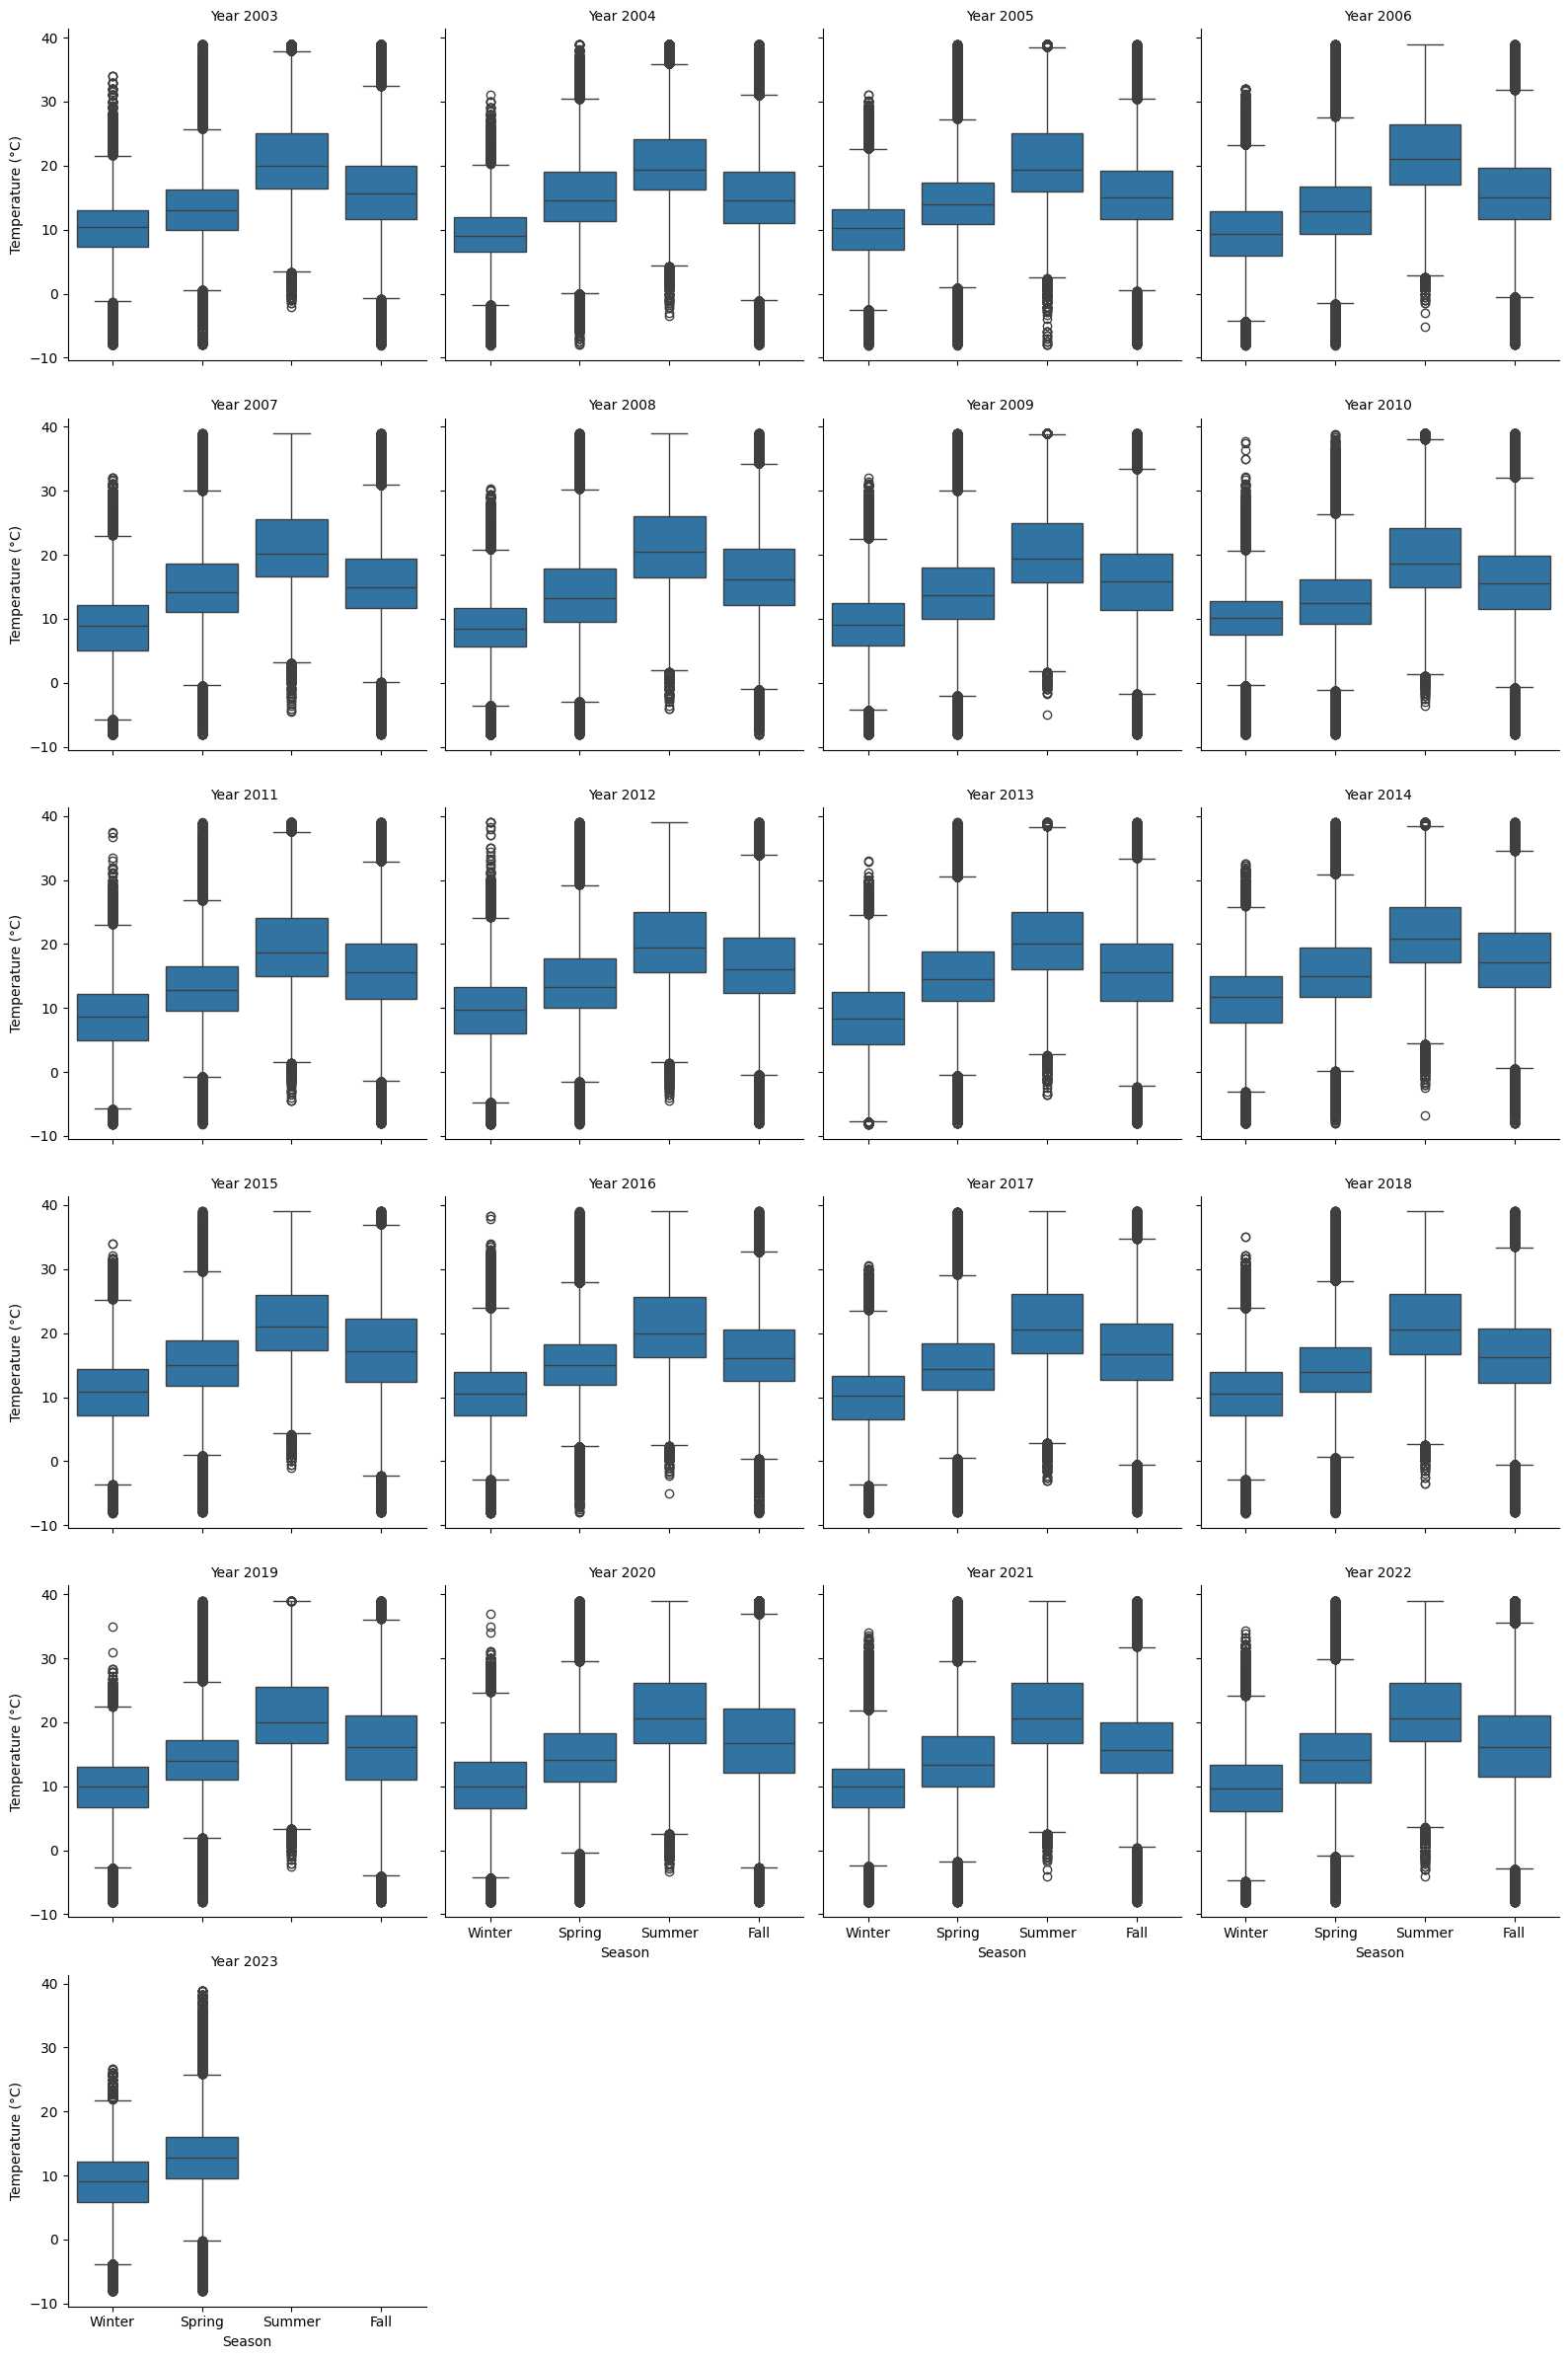

In [3]:
g = sns.FacetGrid(CA_stations_dfs, col="Year", col_wrap=4, height=4)
g.map(sns.boxplot, "Season", "Temperature", order=['Winter', 'Spring', 'Summer', 'Fall'])
g.set_axis_labels("Season", "Temperature (°C)")
g.set_titles("Year {col_name} ")
plt.show()

In [23]:
from sklearn.linear_model import LinearRegression

seasons = CA_stations_dfs['Season'].unique()

# Fit linear regression model for each season
for season in seasons:
    season_data = CA_stations_dfs[CA_stations_dfs['Season'] == season]
    X = season_data['Year'].values.reshape(-1, 1)
    y = season_data['Temperature'].values
    model = LinearRegression().fit(X, y)
    print(f'Season: {season}, Slope: {model.coef_[0]:.4f}, Intercept: {model.intercept_:.4f}')


Season: Winter, Slope: 0.0373, Intercept: -65.4684
Season: Spring, Slope: 0.0210, Intercept: -27.9335
Season: Summer, Slope: 0.0510, Intercept: -81.4836
Season: Fall, Slope: 0.0659, Intercept: -116.3473


The slope for each season tells us how much the temperature (in Celsius) each season changes as each year increases. The intercept in this context does not have much significance as we are observing a large period of time far from when year = 0.

# Summarize Findings

1. Low R^2 value: a value of 0.1667 indicates that temperature change over time doesn’t represent a linear relationship at all
- essentially, the changes in temperature over the years are more independent of time and are likely influenced by other environmental factors that pertain to specific years
- these factors could be random, rare seasonal changes for a specific year (such as 2011 and 2014 being very low and high in temperature respectively)
2. slope value: a very low yet positive slope value of 0.0411 suggests that the mean temperature each year slightly increases by a factor of 0.0411 degrees celsius per year
- however, the data suggests that with each year, the average temperature doesn’t necessarily increase steadily but rather warrants no relationship between time and temperature (according to the R^2 value explained above)

### Conclusion:
Temperature changes over the last two decades are highly uncorrelated to time. Essentially, with a R^2 value of 0.1667 that’s very close to zero, this suggests that temperature doesn’t fit a linear relationship between temperature and time. Since temperature has a little to no correlation to temperature, this implies that there are seasonal changes that account for mean temperature changes for certain years.

#### Environmental events:

* La nina in 2011 and extreme droughts in 2014
- la nina: first signs of upwelling during the summer of 2010 and worsened in 2011
- this truthfully aligns with the graph since the mean temperature drastically dips in 2010, followed by an all time low mean temperature in 2011 (Bjorkstedt 2012)
- this event occurring in the summer accounts for the drastic change since a typically hot season (summer) exhibited cooler temperatures
* droughts: the Persistent High-Amplitude Ridge contributed to severe droughts that took effect starting 2013 and especially 2014 due to high atmospheric pressure in specific areas (Wang 2014)
- These areas were concentrated in Alaska, which explains why California didn’t experience as many rainstorms and instead received much more radiation from the sun, causing the intense drought and increased temperatures.

Citations:
BjorkstEdt, E. P., Goericke, R., McClatchie, S., Weber, E. D., Watson, W., Lo, N., ... & Abell, J. (2011). State of the California Current 2010-2011: Regionally variable responses to a strong (but fleeting?) La Niña. CalCOFI Rep, 52, 36-68.
Wang, S.-Y., L. Hipps, R. R. Gillies, and J.-H. Yoon (2014), Probable causes of the abnormal ridge accompanying the 2013–2014 California drought: ENSO precursor and anthropogenic warming footprint, Geophys. Res. Lett., 41, 3220–3226, doi:10.1002/2014GL059748. 